In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Project
## Predicting the Introverts from the Extroverts

In [3]:
train=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Competitions\playground-series-s5e7\train.csv")
test=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Competitions\playground-series-s5e7\test.csv")
submission=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Competitions\playground-series-s5e7\sample_submission.csv")

# Data Info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [7]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6175 non-null   int64 
 1   Personality  6175 non-null   object
dtypes: int64(1), object(1)
memory usage: 96.6+ KB


In [8]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [9]:
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [10]:
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [11]:
train.shape

(18524, 9)

In [12]:
test.shape

(6175, 8)

# Data Cleaning & Handling

In [13]:
num_col = train.select_dtypes(include="number")

for col in num_col.columns:
    skew_val = train[col].skew()
    print(f"Skewness of {col}: {round(skew_val, 3)}")


Skewness of id: 0.0
Skewness of Time_spent_Alone: 1.134
Skewness of Social_event_attendance: -0.229
Skewness of Going_outside: -0.367
Skewness of Friends_circle_size: -0.052
Skewness of Post_frequency: -0.059


In [14]:
skew_val = train["Time_spent_Alone"].skew()
print("Skewness:", skew_val)

Skewness: 1.1337770367197073


In [15]:
num_col = train.select_dtypes(include="number")

for col in num_col.columns:
    train[col] = train[col].fillna(train[col].median())

In [16]:
cat_cols = train.select_dtypes(include="object")

for colx in cat_cols.columns:
    train[colx] = train[colx].fillna(train[colx].mode()[0])

In [17]:
# Handle numerical columns
num_col = test.select_dtypes(include="number")

for col in num_col.columns:
    test[col] = test[col].fillna(test[col].median())

# Handle categorical columns
cat_cols = test.select_dtypes(include="object")

for colx in cat_cols.columns:
    test[colx] = test[colx].fillna(test[colx].mode()[0])


In [18]:
train.isna().sum()
test.isna().sum()
train.duplicated().sum()
test.duplicated().sum()

np.int64(0)

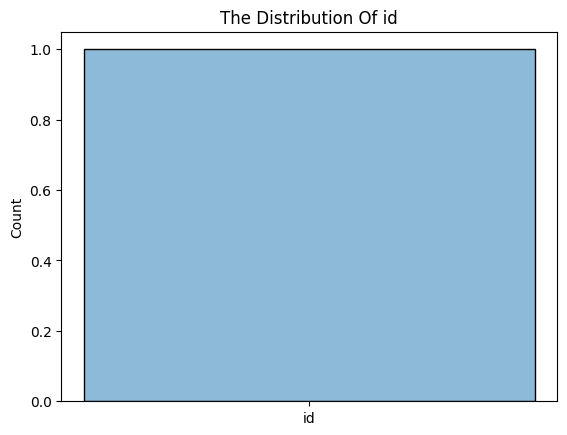

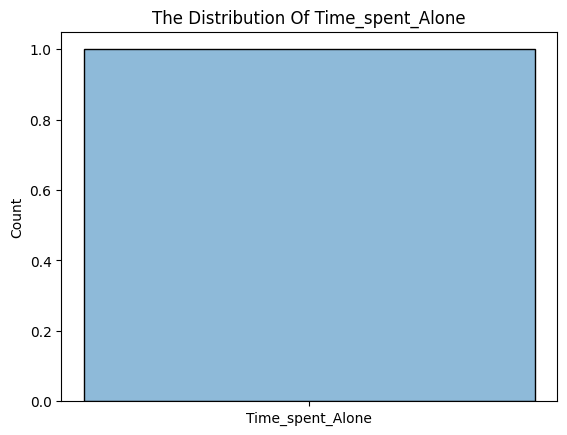

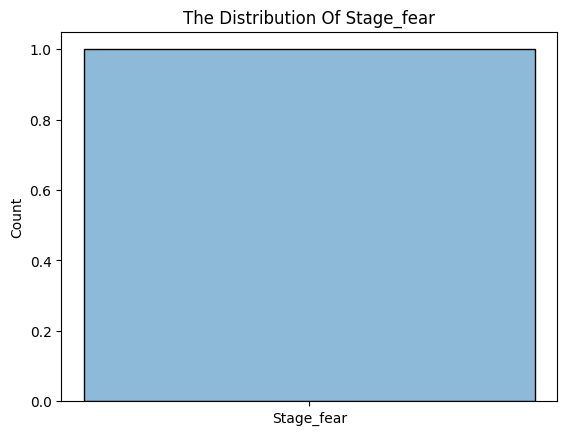

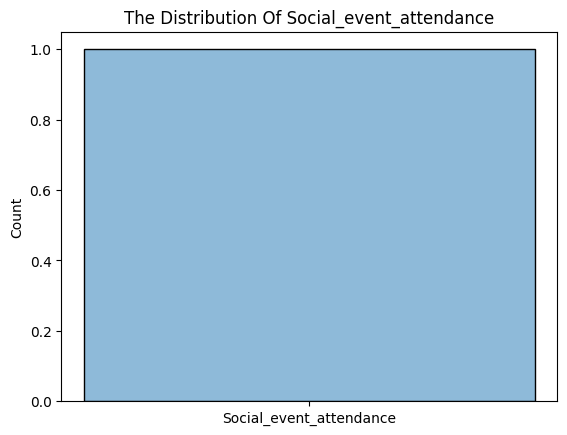

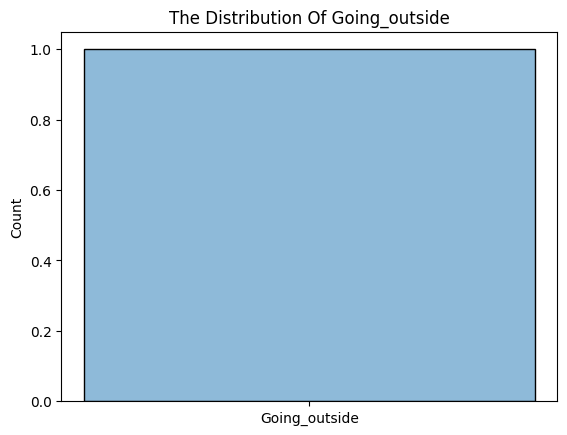

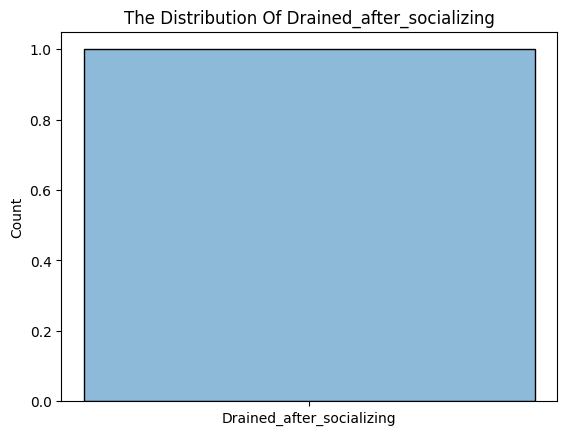

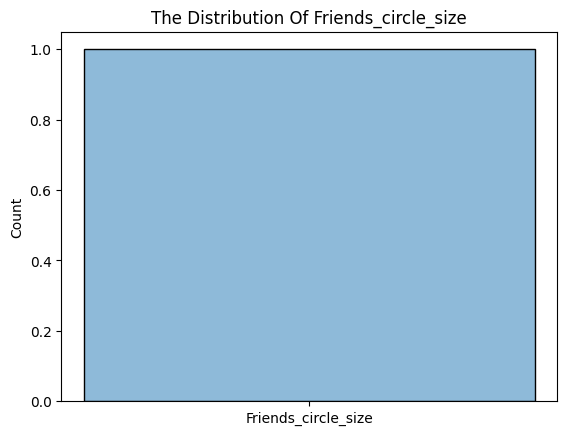

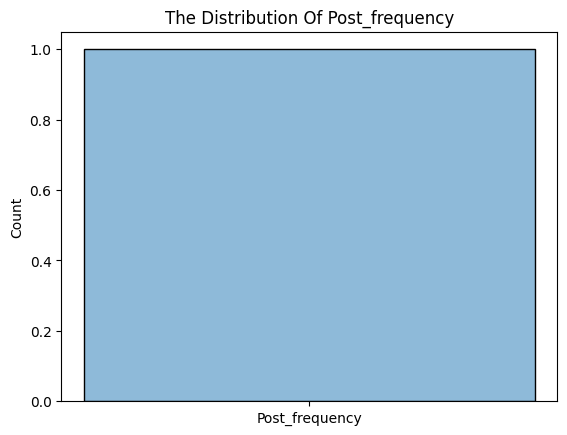

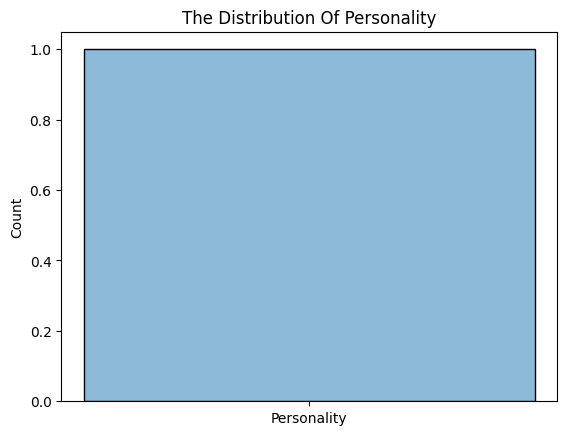

In [19]:
for i in train.columns:
    sns.histplot(data=i,kde=True)
    plt.title(f"The Distribution Of {i}")
    plt.show()

# EDA & Visualization

In [20]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


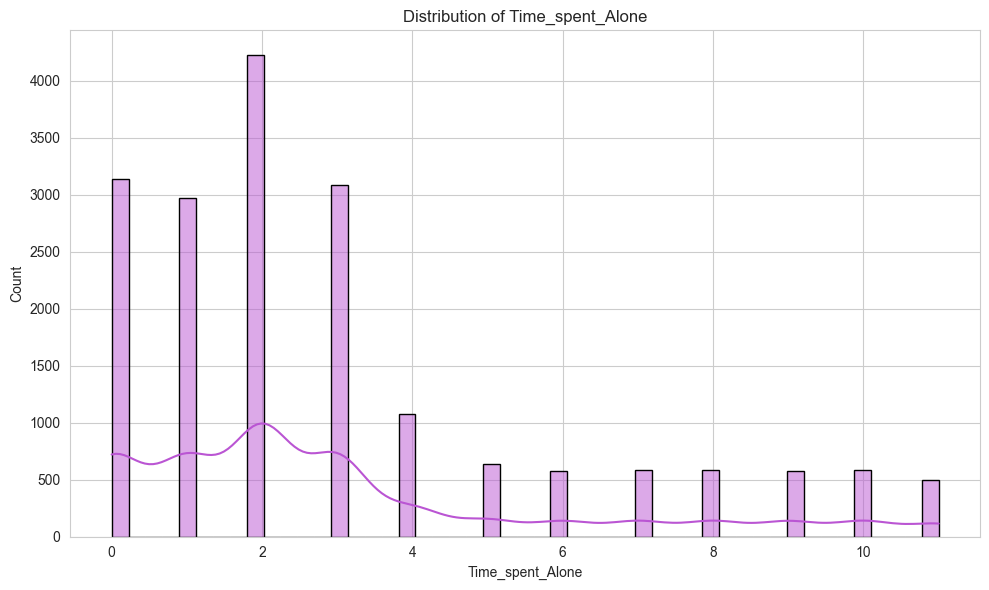

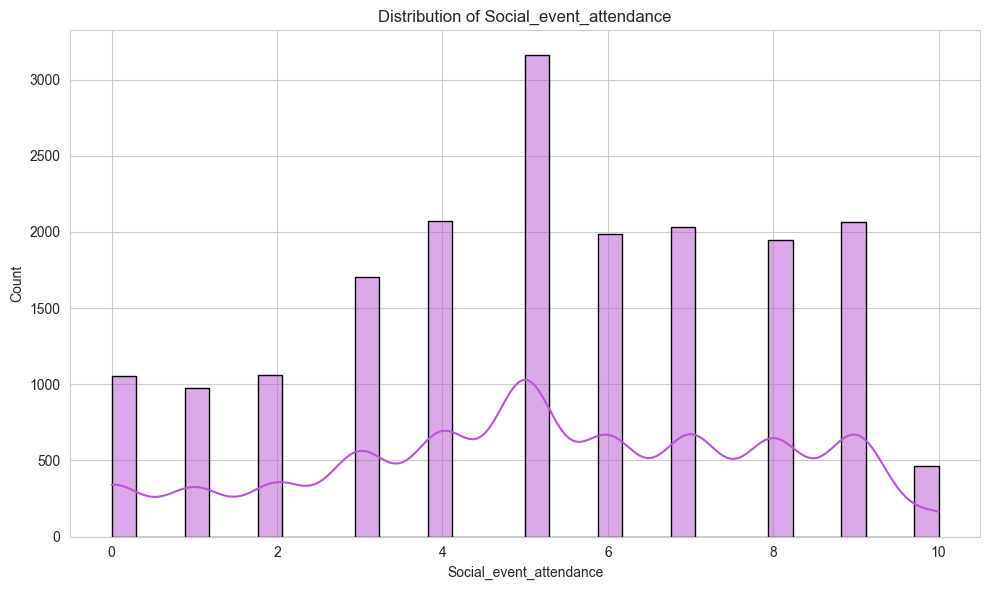

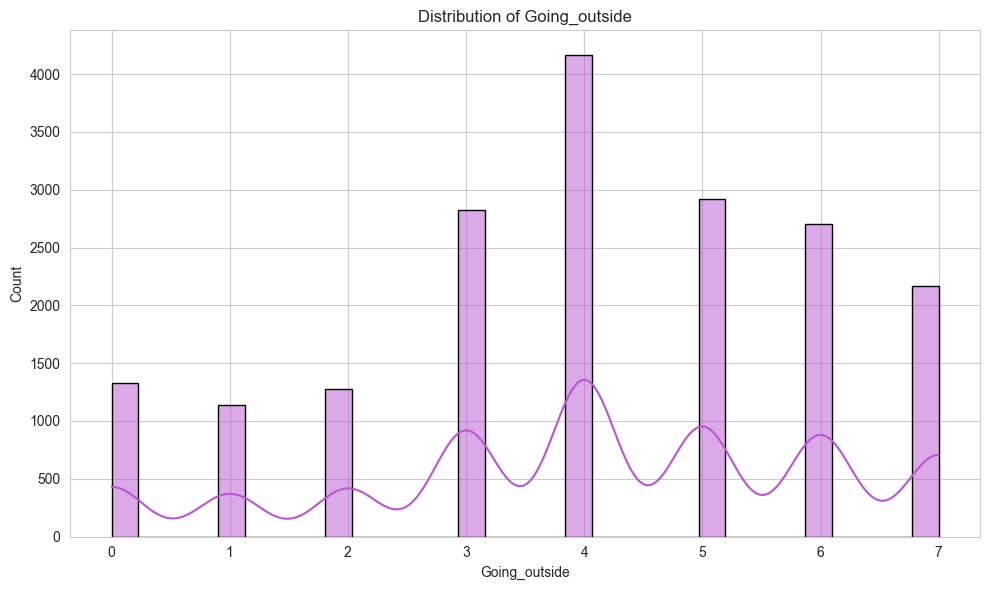

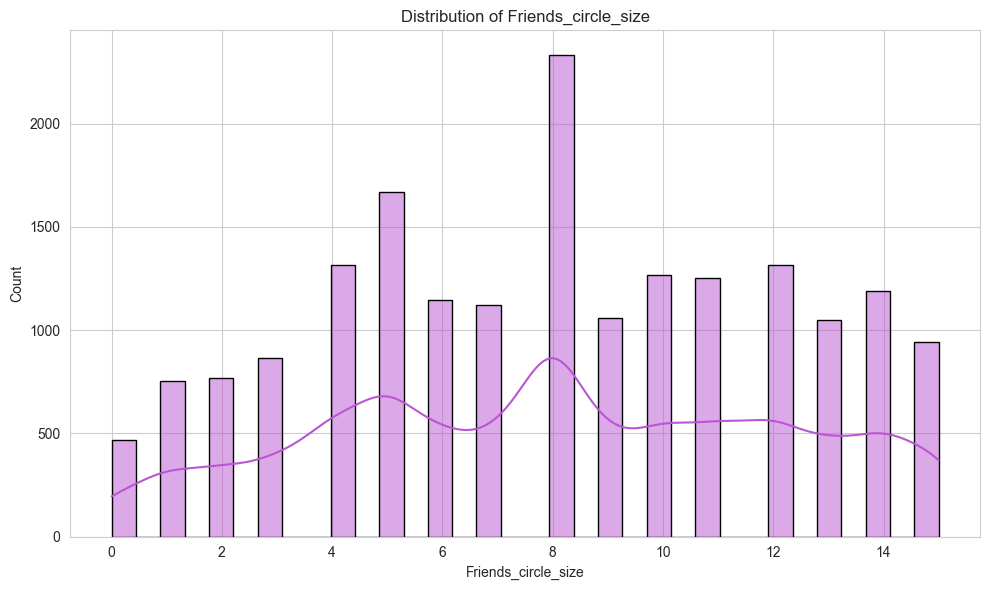

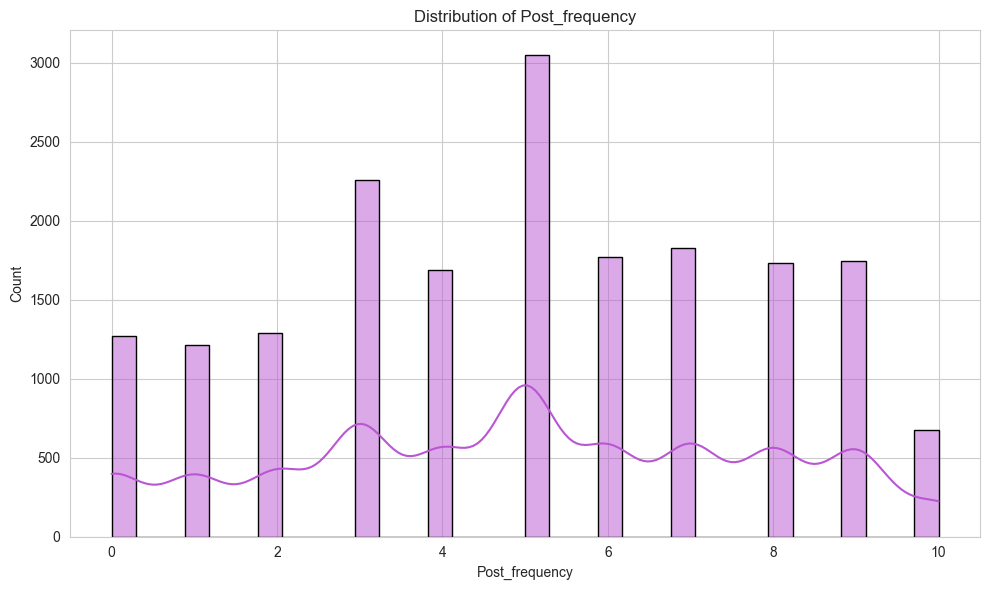

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = ["Time_spent_Alone", "Social_event_attendance", "Going_outside",
            "Friends_circle_size", "Post_frequency"]

# Plot histograms with KDE
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.histplot(data=train, x=col, kde=True, color='mediumorchid',edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

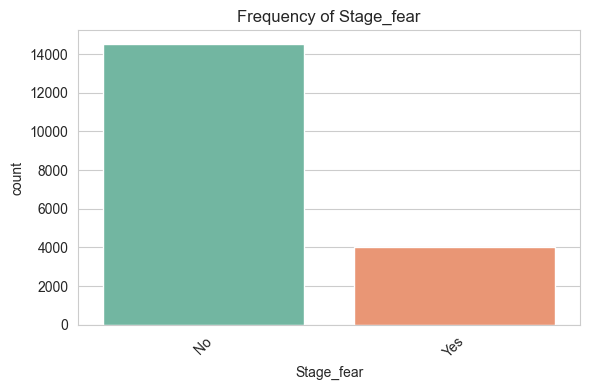

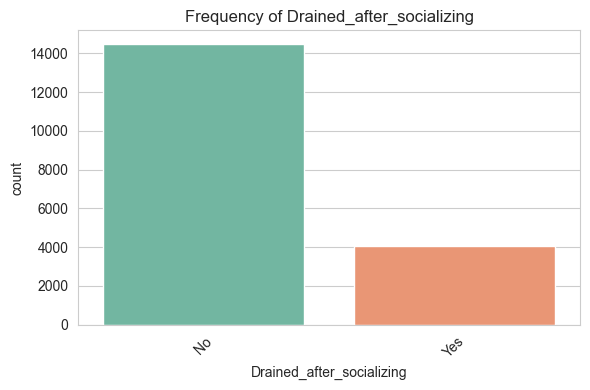

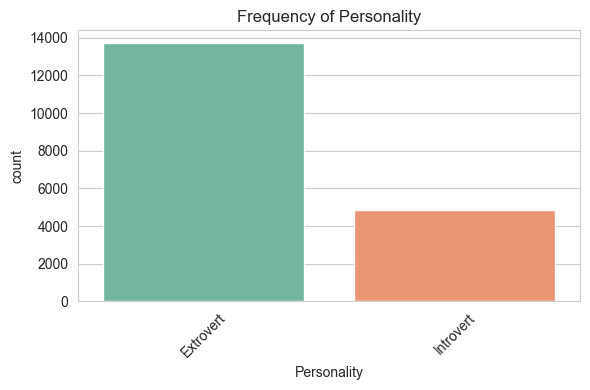

In [23]:
cat_cols = ["Stage_fear", "Drained_after_socializing", "Personality"]

# Count plots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=col, palette="Set2")
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [24]:
import plotly.express as px

# Step 1: Count category frequencies
personality_counts = train["Personality"].value_counts().reset_index()
personality_counts.columns = ["Personality", "Count"]

# Step 2: Plot pie chart
fig = px.pie(personality_counts, names="Personality", values="Count",
             title="Personality Distribution",
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


In [25]:
cat_cols = ["Stage_fear", "Drained_after_socializing", "Personality"]

for col in cat_cols:
    counts = train[col].value_counts().reset_index()
    counts.columns = [col, "Count"]

    fig = px.pie(counts, names=col, values="Count",
                 title=f"{col} Distribution",
                 color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.show()


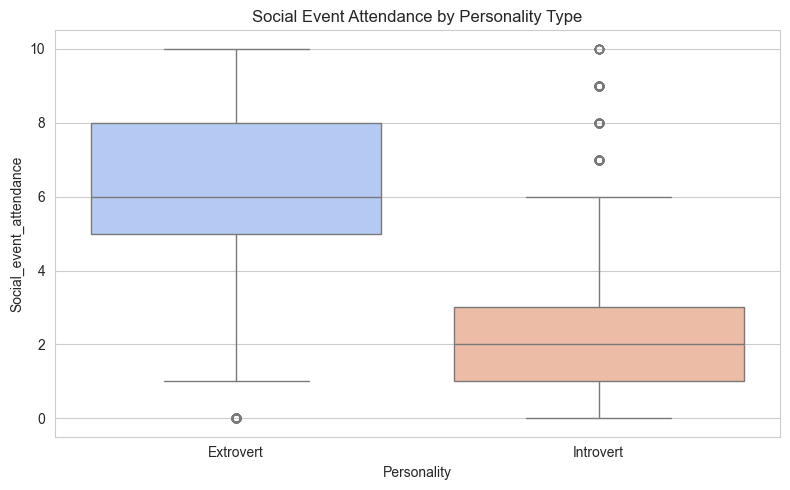

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, x="Personality", y="Social_event_attendance", palette="coolwarm")
plt.title("Social Event Attendance by Personality Type")
plt.tight_layout()
plt.show()


# Machine Learning

In [27]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert


In [28]:
cat_cols

['Stage_fear', 'Drained_after_socializing', 'Personality']

In [29]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
for colm in cat_cols:
    train[colm]=le.fit_transform(train[colm])

In [30]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
X=train.drop(columns=["Personality"])
y=train["Personality"]
X_train,X_test,y_train,y_test=(train_test_split(X,y,test_size=0.2,random_state=42))
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model_lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred=model_lr.predict(X_test_scaled)
from sklearn.metrics import (
    accuracy_score,classification_report,
    r2_score,confusion_matrix,
    roc_auc_score,mean_absolute_error,
    mean_squared_error
)
y_pred_proba=model_lr.predict_proba(X_test_scaled)[:,1]
acc=accuracy_score(y_test,y_pred)
print(f"The Accuracy Score Is {acc:.2f}")

The Accuracy Score Is 0.97


In [32]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc)

Accuracy: 0.968421052631579
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

Confusion Matrix:
[[2703   50]
 [  67  885]]
AUC-ROC: 0.9577992838980853


In [33]:
test_cat_cols=test.select_dtypes(include="object")
for colss in test_cat_cols:
    test[colss]=le.fit_transform(test[colss])

In [34]:
test_df=scaler.transform(test)
prediction=model_lr.predict(test_df)

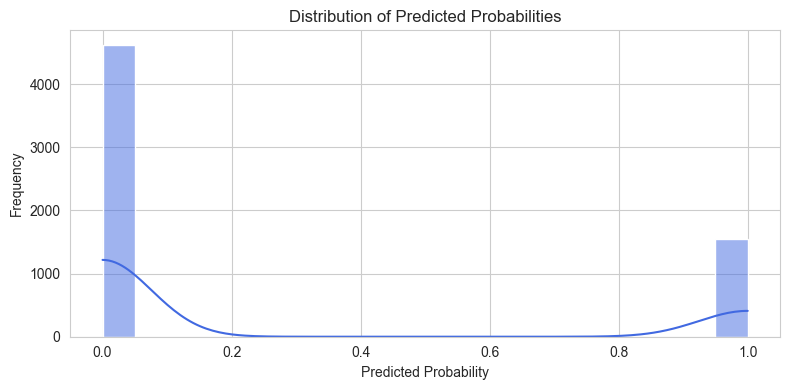

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(prediction, bins=20, kde=True, color='royalblue')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


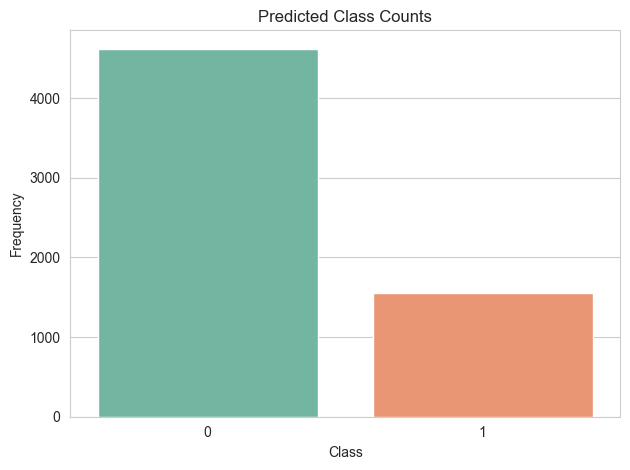

In [39]:
import pandas as pd

pred_df = pd.DataFrame(prediction, columns=["Predicted"])
sns.countplot(data=pred_df, x="Predicted", palette="Set2")
plt.title("Predicted Class Counts")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [36]:
submission["Personality"]=prediction
submission.shape
submission_df = submission.reset_index(drop=True)
submission_df = pd.DataFrame({'id': submission_df["id"], 'Personality': prediction})
submission_df['Personality'] = submission_df['Personality'].map({0: 'Introvert', 1: 'Extrovert'})
submission_df
submission_df.to_csv(r"my_submission.csv", index=False)
print('save csv success')

save csv success
